In [1]:
pip install nltk

In [21]:
# División de una oración en palabras individuales.

# Importar las bibliotecas necesarias
import nltk
from nltk.tokenize import word_tokenize

# Descargar los datos
nltk.download('punkt')

# División de una oración en palabras individuales
sentence = "NLTK es una biblioteca de procesamiento de lenguaje natural en Python"
tokens = word_tokenize(sentence)
print(tokens)

['NLTK', 'es', 'una', 'biblioteca', 'de', 'procesamiento', 'de', 'lenguaje', 'natural', 'en', 'Python']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
#Reducción de palabras a su forma base con NLTK
from nltk.stem import PorterStemmer

#words = ['trabanjando', 'trabajos', 'trabajador']
words = ['running', 'plays', 'jumped']
stemmer = PorterStemmer()
stem = [stemmer.stem(word) for word in words]
print(stem)

['run', 'play', 'jump']


In [23]:
#Etiquetado gramatical de palabras en una oración.

# Importar las bibliotecas necesarias
import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')

# Etiquetado gramatical de palabras en una oración
sentence = "NLTK es una biblioteca de procesamiento de lenguaje natural en Python"
tokens = word_tokenize(sentence)
tagged_words = pos_tag(tokens)
print(tagged_words)

[('NLTK', 'NNP'), ('es', 'CC'), ('una', 'JJ'), ('biblioteca', 'NN'), ('de', 'IN'), ('procesamiento', 'FW'), ('de', 'FW'), ('lenguaje', 'FW'), ('natural', 'JJ'), ('en', 'FW'), ('Python', 'NN')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [24]:
#Ejemplo básico de clasificador de textos utilizando el clasificador
#Naive Bayes de NLTK

# 1. Importación de bibliotecas
import nltk
import random
import matplotlib.pyplot as plt

data = [
    ("I love this movie", "positive"),
    ("This movie is terrible", "negative"),
    ("This movie is great" , "positive"),
    ("I dislike this movie", "negative"),
    ("This film is amazing", "positive"),
    ("I can't stand watching this movie", "negative"),
    ("The acting in this movie is phenomenal", "positive"),
    ("I regret wasting my time on this film", "negative"),
    ("I thoroughly enjoyed this movie", "positive"),
    ("This movie lacks depth and substance", "negative"),
    ("The plot of this movie was captivating", "positive"),
    ("I found the characters in this film to be very engaging", "positive"),
    ("The special effects in this movie were impressive", "positive"),
    ("The storyline was predictable and unoriginal", "negative"),
    ("I was disappointed by the lack of character development", "negative"),
    ("The cinematography in this film was stunning", "positive"),
    ("The dialogue felt forced and unnatural", "negative"),
    ("The pacing of the movie was too slow for my liking" , "negative"),
    ("I was pleasantly surprised by how much I enjoyed this film", "positive"),
    ("The ending left me feeling unsatisfied and confused", "negative"),
    ("This movie exceeded my expectations", "positive"),
    ("The performances by the actors were lackluster", "negative")
]




In [25]:

#Preprocesamiento de datos: tokenización y extracción de características
def preprocess_data(text):
    preprocessed_data = []
    tokens = nltk.word_tokenize(text)
    return {word: True for word in tokens}

In [26]:

# Aplicamos el preprocesamiento a los datos
featuresets = [(preprocess_data(text), label) for (text, label) in data]

In [27]:
#Dividimos los datos en conjunto de entrenamiento y prueba
train_set, test_set = featuresets[:16], featuresets[16:]

In [28]:
#Entrenamos un clasificador utilizando Naive Bayes
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [29]:
#Evaluamos el clasificador en el conjunto de prueba
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


<Figure size 400x200 with 0 Axes>

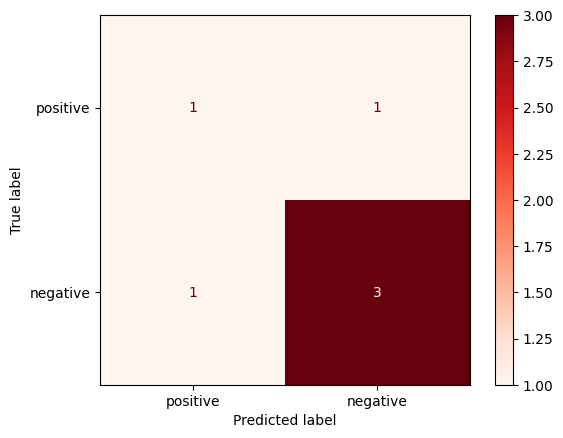

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener etiquetas verdaderas y predichas para la matriz de confusión
true_labels = [label for (features, label) in test_set]
predicted_labels = [classifier.classify(features) for (features, label) in test_set]

# Generar la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels, labels=["positive", "negative"])

# Dibujar la matriz de confusión
plt.figure(figsize=(4, 2))  # Ajusta el tamaño del gráfico aquí
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative"])
disp.plot(cmap=plt.cm.Reds)
plt.show()

In [40]:
# 8. Clasificación de un nuevo texto
#Clasificamos un nuevo texto
new_text = "This movie is amazing"
new_text_features = preprocess_data(new_text)
predicted_label = classifier.classify(new_text_features)
print("Predicted_label:", predicted_label)

Predicted_label: positive


#Preguntas de comprensión:

1.	¿Qué tarea realiza el código proporcionado?
    
    R. clasifica un nuevo texto, entre positivo y negativo.

2.	¿Cuál es el propósito del preprocesamiento de datos en este contexto?
    
    R. convertir un listado de tuplas en un diccionario.

3.	¿Qué función de NLTK se utiliza para tokenizar el texto?
    
    R. word_tokenize. Esta función divide el texto en palabras o tokens.

4.	¿Cuál es el propósito de dividir los datos en conjuntos de entrenamiento y prueba?

    R. es evaluar y entrenar el modelo de clasificación.

5.	¿Qué algoritmo de clasificación se utiliza en este código?
    
    R. El algoritmo de clasificación utilizado es Naive Bayes.


6.	¿Cómo se evalúa la precisión del clasificador?
    
    R.La precisión del clasificador se evalúa utilizando varias métricas Exactitud (Accuracy,La proporción de predicciones correctas sobre el total de predicciones realizadas.),
    Precisión (La proporción de predicciones positivas correctas sobre el total de predicciones positivas realizadas),
    F1 Score:Definición(La media armónica de la precisión y la recuperación),
    Matriz de Confusión(Una tabla que muestra el número de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos).


7.	¿Qué se entiende por "Accuracy" en el contexto de evaluación del clasificador?
    
    R. Exactitud (Accuracy,La proporción de predicciones correctas sobre el total de predicciones realizadas.)


8.	¿Cuál es el resultado de la clasificación del nuevo texto "This movie is amazing"?

    R.(Predicted_label: positive).

